### Antes da disciplina, qual era o seu nível de conhecimento em Engenharia de Software Experimental?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, wilcoxon

In [2]:
df = pd.read_csv("../csv/feedback-v2.csv")
df.columns = df.columns.str.strip()

In [3]:
df["Antes da disciplina, qual era o seu nível de conhecimento em Engenharia de Software Experimental?"]

scale = {
    "Nenhum. Não conhecia Engenharia de Software Experimental.": 0,
    "Baixo. Adquiri conhecimentos básicos sobre Engenharia de Software Experimental em aulas ou livros.": 1,
    "Médio. Já havia utilizado conceitos de Engenharia de Software Experimental em projetos de pesquisa.": 2,
    "Alto. Já havia utilizado conceitos de Engenharia de Software Experimental em cinco ou mais projetos.": 3
}

df["Nivel de conhecimento antes da disciplina"] = df["Antes da disciplina, qual era o seu nível de conhecimento em Engenharia de Software Experimental?"] \
    .map(scale) 

In [4]:
all_levels = [0, 1, 2, 3]

labels = {
    0: "None (Did not know Experimental Software Engineering)",
    1: "Low (Basic knowledge from classes/books)",
    2: "Medium (Used in research projects)",
    3: "High (Used in 5+ projects)"
}

colors = {
    0: "#d62728",  # Azul
    1: "#ff7f0e",  # Laranja
    2: "#2ca02c",  # Verde
    3: "#1f77b4"   # Vermelho
}

In [5]:
counts = (
    df["Nivel de conhecimento antes da disciplina"]
    .value_counts()
    .reindex(all_levels, fill_value=0)
)

percent = (counts / counts.sum() * 100).round(1)

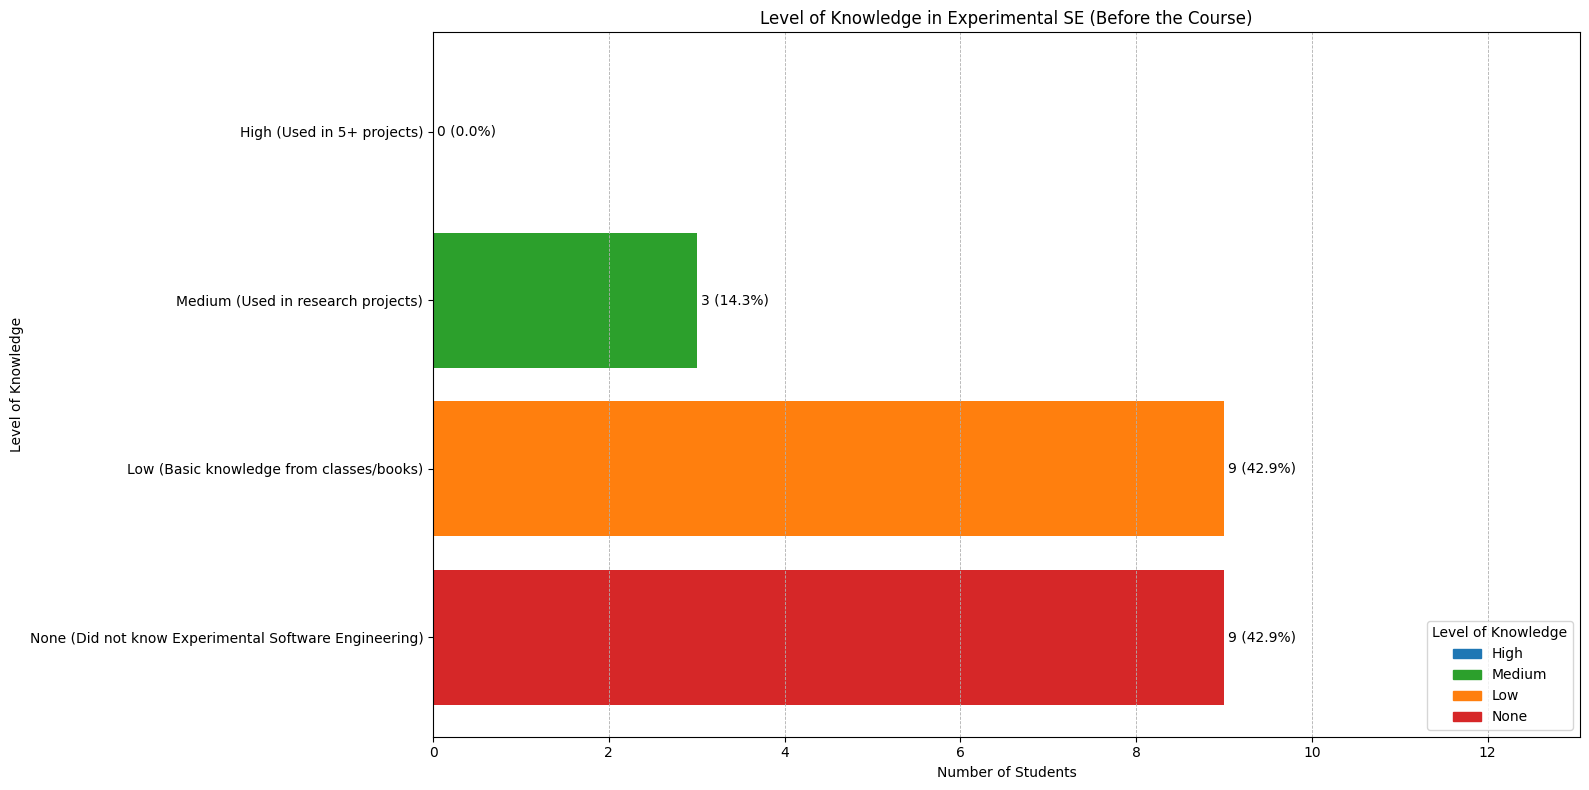

In [6]:
plt.figure(figsize=(16, 8))  

plt.xlim(0, counts.max() + counts.max() * 0.45)  

plt.barh(
    [labels[i] for i in all_levels],
    counts.values,
    color=[colors[i] for i in all_levels]
)

# texto
max_val = counts.max()
offset = max_val * 0.05 if max_val > 0 else 0.3

for i, (c, p) in enumerate(zip(counts.values, percent.values)):
    plt.text(c + 0.05, i, f"{c} ({p}%)", va="center")

# Estética
plt.xlabel("Number of Students")
plt.ylabel("Level of Knowledge")
plt.title("Level of Knowledge in Experimental SE (Before the Course)")
plt.grid(axis='x', linestyle='--', linewidth=0.6)

# Legenda igual à do exemplo
legend_labels = ["High", "Medium", "Low", "None"]
legend_colors = ["#1f77b4", "#2ca02c", "#ff7f0e", "#d62728"]
patches = [plt.Rectangle((0,0),1,1, color=c) for c in legend_colors]

plt.legend(
    patches,
    legend_labels,
    title="Level of Knowledge",
    loc="lower right",
)

plt.tight_layout()
plt.show()